# Analyze sequence features of human intron sequences
## Outline
- Investigate the features of sequences near 3'SS and their distances to the 3'SS
    - Make sequence feature visualizations
- Separate single long and short intron sequences based on 3'SS features
    - Classify sequences using simple algorithms

*Reduce the number of sequences if it is taking too long

## Part 1: sequence features along positions near 3'SS

In [1]:
import pandas as pd

The column `flanking200+intron` contains the sequences from upstream 100bp of 5'SS to downstream 100bp of 3'SS

In [2]:
dfintron_long=pd.read_csv("./hg19_long_intron.csv")
dfintron_short=pd.read_csv("./hg19_short_intron.csv")

Prepare the input sequences and the sequence tags
- use 1000 sequences for each group

In [3]:
sequences=[x[-200:-102] for x in list(dfintron_long['flanking200+intron'])[:1000]]+[x[-200:-102] for x in list(dfintron_short['flanking200+intron'][:1000])]
sequence_tags=['long intron' for i in range(1000)]+['short intron' for i in range(1000)]

In [4]:
%load_ext autoreload
%autoreload 2
import sys
%reload_ext autoreload
sys.path.append('../')
import muse

In [5]:
#generate the LDA model object
hg19_ASC=muse.muse('ASC',6,sequences,sequence_tags,topic_size=6,sliding_window=6)
#make k-mer matrix
hg19_ASC.matrix_generate()
#fit model by k-mer counts
hg19_ASC.LDA()

(<Figure size 800x800 with 2 Axes>,
 array([<AxesSubplot:title={'center':'long intron'}, xlabel='Sample ID', ylabel='Topic Membership'>,
        <AxesSubplot:title={'center':'short intron'}, xlabel='Sample ID', ylabel='Topic Membership'>],
       dtype=object))

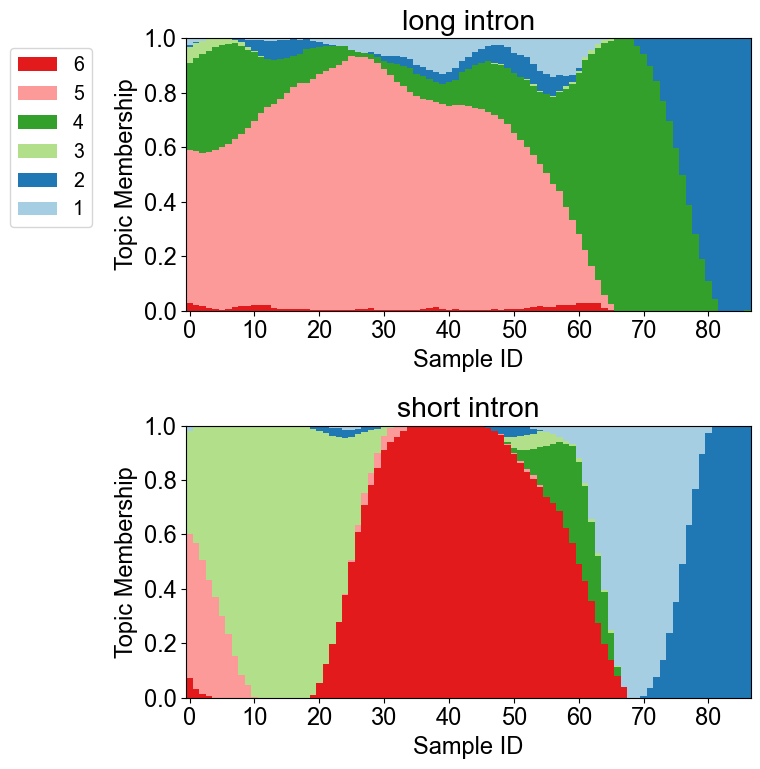

In [6]:
#make the structureplot
hg19_ASC.structurePlot()

In [7]:
#calculate the driving k-mers for the topics
hg19_ASC.drivingKmer()

In [8]:
#show the driving k-mers
hg19_ASC.dKmer[:10]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
0,AGGCGT,TTTTTT,GGTGAG,TTAACC,TAGACA,CCTGGC
1,CGTGGC,TTTCTT,CAGGTA,GCTTAT,AGGATT,CTGGCC
2,GCGTGG,TCTTTT,GGTAAG,ACCACG,TGTTAG,ATGGAG
3,GTGGCC,TTCTCT,AGGTAA,CTTACG,TGTAAA,CCATGG
4,GGCGTG,TTTTCT,GTAAGT,CGGCTA,GTAGAC,GAGGCC
5,TTGGCG,TTTTTC,GTGAGT,GGCTTA,AAAAAA,CATGGA
6,GAGGCG,TCTCTT,AGGGAG,CTCATA,CATGAA,CACACA
7,TGACAC,CTTTCT,AAGGTA,ACTAAT,ATGAGT,GGAGGC
8,ACTGAG,TCTCTC,AGGTGA,ATGACT,TCGAAT,TGGCCC
9,TGAGGC,CTCTTT,GCGCAG,AATATT,AAAACA,CAGGGC


(<Figure size 750x390 with 1 Axes>, <AxesSubplot:>)

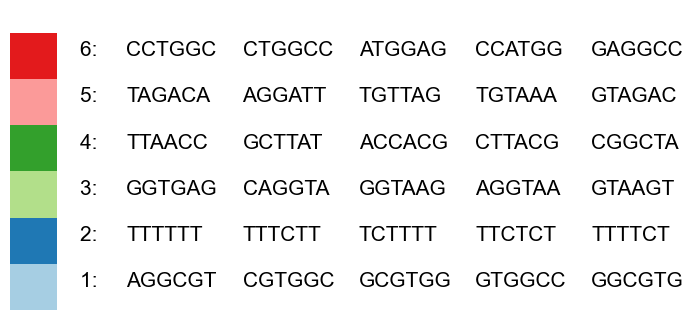

In [9]:
#make a figure to show both topic color and top 5 driving k-mers
hg19_ASC.drivingKmerPlot(knum=5)

## Part 2: distinguish single long and short intron sequences

Prepare the sequences for single sequence analysis
- use 8000
sequences in each group
    - each subgroup has 20 sequences
- get subsequences from 50bp upstream of 3'SS to 30bp downstream of 3'SS

In [10]:
sequences2=[x[-150:-70] for x in list(dfintron_long['flanking200+intron'])[:2500]]+[x[-150:-70] for x in list(dfintron_short['flanking200+intron'][:2500])]
sequence_tags2=['long intron' for i in range(2500)]+['short intron' for i in range(2500)]

In [11]:
#generate the LDA model object
hg19_AWSC=muse.muse('AWSC',3,sequences2,sequence_tags2,topic_size=2,sliding_window=6,subgroup_size=50)
#make k-mer matrix
hg19_AWSC.matrix_generate()
#fit model by k-mer counts
hg19_AWSC.LDA()

(<Figure size 800x800 with 2 Axes>,
 array([<AxesSubplot:title={'center':'long intron'}, xlabel='Sample ID', ylabel='Topic Membership'>,
        <AxesSubplot:title={'center':'short intron'}, xlabel='Sample ID', ylabel='Topic Membership'>],
       dtype=object))

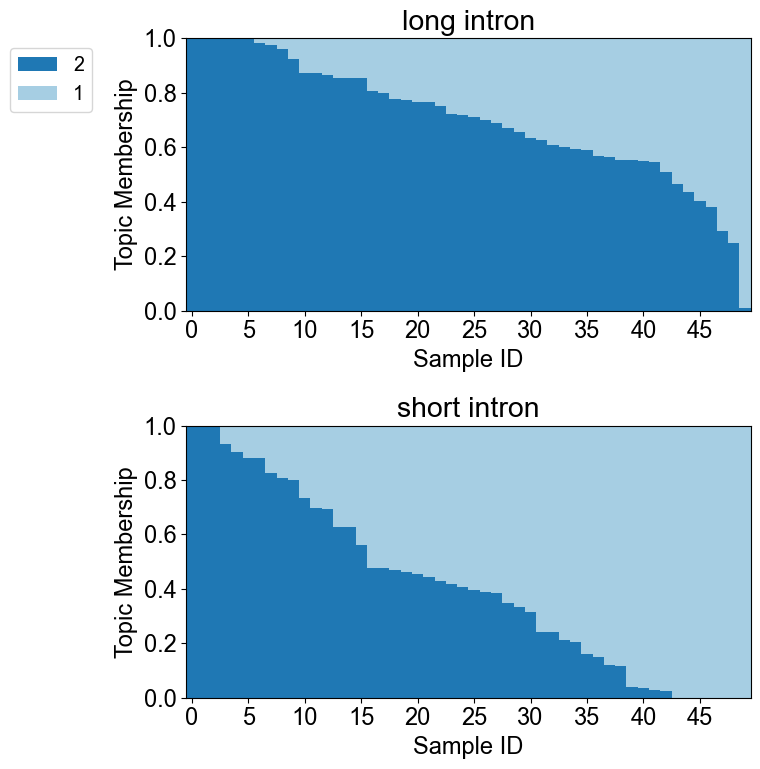

In [12]:
#make the structureplot
hg19_AWSC.structurePlot(sortby='topic_2')

Test the performance on single sequences

In [13]:
sequences_test=[x[-150:-70] for x in list(dfintron_long['flanking200+intron'])[-500:]]+[x[-150:-70] for x in list(dfintron_short['flanking200+intron'][-500:])]
sequences_test_tags=['long intron' for i in range(500)]+['short intron' for i in range(500)]

In [14]:
hg19_AWSC.transform_newdata(sequences_test,sequences_test_tags)

(<Figure size 800x800 with 2 Axes>,
 array([<AxesSubplot:title={'center':'long intron'}, xlabel='Sample ID', ylabel='Topic Membership'>,
        <AxesSubplot:title={'center':'short intron'}, xlabel='Sample ID', ylabel='Topic Membership'>],
       dtype=object))

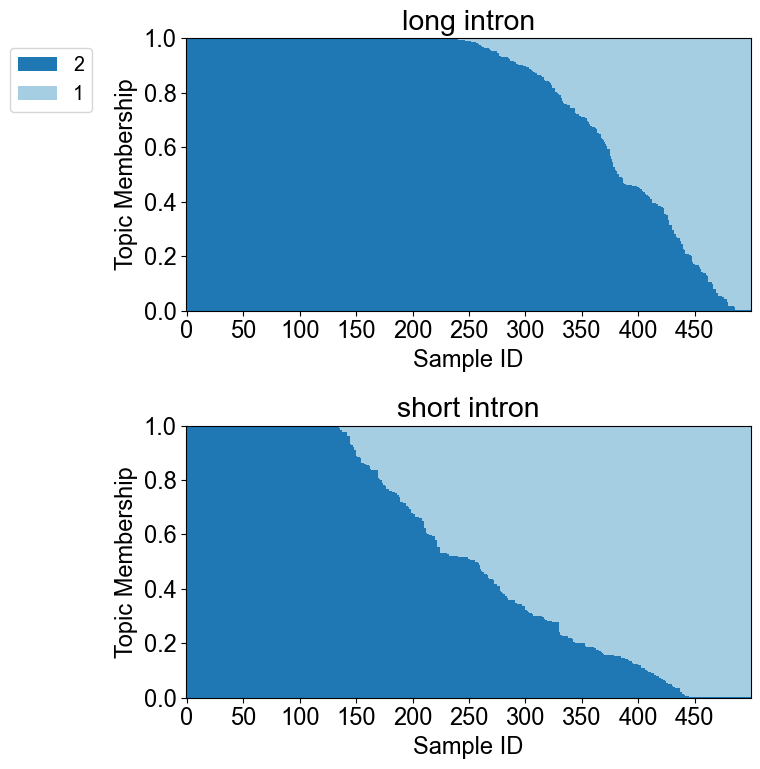

In [15]:
hg19_AWSC.structurePlot(sortby='topic_2',plot_test=True)

Show the driving K-mers

In [16]:
hg19_AWSC.drivingKmer()

(<Figure size 750x150 with 1 Axes>, <AxesSubplot:>)

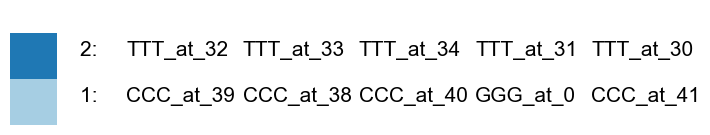

In [17]:
hg19_AWSC.drivingKmerPlot(knum=5)